In [43]:
library(keras)

In [44]:
idx <- sample(1:nrow(iris), 20)
train <- iris[-idx, ]
test <- iris[idx,]
new.data <- matrix(scale(test[,1:4]), nrow=20, ncol=4)

X <- matrix(scale(train[,1:4]), nrow=130, ncol=4)
Y <- matrix(as.integer(train[,5])-1) %>%                   # f..k, python start index from 0
        to_categorical(num_classes=3)      


In [45]:

model_adam <- keras_model_sequential() 
model_sgd  <- keras_model_sequential()
model_rmsprop <- keras_model_sequential()

In [46]:
model_adam %>% 
            layer_dense(units = 10, activation = 'relu', input_shape = c(4)) %>% 
            layer_dense(units =  3, activation = 'softmax') %>%
            compile(
                     loss = 'categorical_crossentropy',   #mae, mse, only one
                     optimizer = 'adam',
                     metrics = c('accuracy')              #mae, mse, could be all three
                 )

model_sgd %>%    
            layer_dense(units = 10, activation = 'relu', input_shape = c(4)) %>% 
            layer_dense(units =  3, activation = 'softmax') %>%
            compile(
                 loss = 'categorical_crossentropy',   #mae, mse, only one
                 optimizer = 'sgd',
                 metrics = c('accuracy')              #mae, mse, could be all three
             )

model_rmsprop  %>%    
            layer_dense(units = 10, activation = 'relu', input_shape = c(4)) %>% 
            layer_dense(units =  3, activation = 'softmax') %>%
            compile(
                 loss = 'categorical_crossentropy',   #mae, mse, only one
                 optimizer = 'rmsprop',
                 metrics = c('accuracy')              #mae, mse, could be all three
             )


In [47]:
options(keras.view_metrics = FALSE)
h_adam <- model_adam %>% fit(
                             X, Y, 
                             epochs = 700, 
                             batch_size = 50, 
                             validation_split = 0.2,
                             callbacks = callback_tensorboard("logs/run_a"),
                            )

h_sgd  <- model_adam %>% fit(
                             X, Y, 
                             epochs = 700, 
                             batch_size = 50, 
                             validation_split = 0.2,
                             callbacks = callback_tensorboard("logs/run_s"),
                            )


h_rmsprop <- model_adam %>% fit(
                             X, Y, 
                             epochs = 700, 
                             batch_size = 50, 
                             validation_split = 0.2,
                             callbacks = callback_tensorboard("logs/run_r"),
                            )


In [48]:
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 8, repr.plot.height = 6)

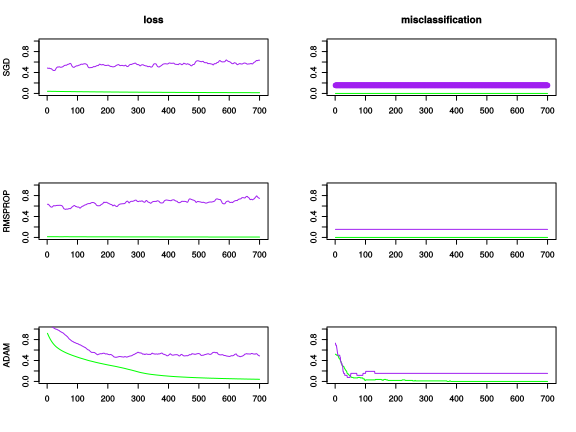

In [49]:
# green for training, purple for validation 

par(mfrow=c(3,2))
plot(h_sgd$metrics$loss, type="l", xlab="", ylab="SGD", main="loss", col="green", ylim=c(0,1))
lines(h_sgd$metrics$val_loss, type="l", xlab="", ylab="", main="", col="purple", ylim=c(0,1))
plot(1-h_sgd$metrics$acc, type="l", xlab="", ylab="", main="misclassification", col="green", ylim=c(0,1))
lines(1-h_sgd$metrics$val_acc, type="p", xlab="", ylab="", main="", col="purple", ylim=c(0,1))

plot(h_rmsprop$metrics$loss, type="l", xlab="", ylab="RMSPROP", main="", col="green", ylim=c(0,1))
lines(h_rmsprop$metrics$val_loss, type="l", xlab="", ylab="", main="", col="purple", ylim=c(0,1))
plot(1-h_rmsprop$metrics$acc, type="l", xlab="", ylab="", main="", col="green", ylim=c(0,1))
lines(1-h_rmsprop$metrics$val_acc, type="l", xlab="", ylab="", main="", col="purple", ylim=c(0,1))

plot(h_adam$metrics$loss, type="l", xlab="", ylab="ADAM", main="", col="green", ylim=c(0,1))
lines(h_adam$metrics$val_loss, type="l", xlab="", ylab="", main="", col="purple", ylim=c(0,1))
plot(1-h_adam$metrics$acc, type="l", xlab="", ylab="", main="", col="green", ylim=c(0,1))
lines(1-h_adam$metrics$val_acc, type="l", xlab="", ylab="", main="", col="purple", ylim=c(0,1))

In [50]:
str(h_sgd)

List of 2
 $ params :List of 8
  ..$ metrics           : chr [1:4] "loss" "acc" "val_loss" "val_acc"
  ..$ verbose           : int 1
  ..$ epochs            : int 700
  ..$ do_validation     : logi TRUE
  ..$ samples           : int 104
  ..$ batch_size        : int 50
  ..$ steps             : NULL
  ..$ validation_samples: int 26
 $ metrics:List of 4
  ..$ acc     : num [1:700] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ val_loss: num [1:700] 0.485 0.481 0.479 0.48 0.48 ...
  ..$ val_acc : num [1:700] 0.846 0.846 0.846 0.846 0.846 ...
  ..$ loss    : num [1:700] 0.041 0.041 0.0409 0.0408 0.0407 ...
 - attr(*, "class")= chr "keras_training_history"


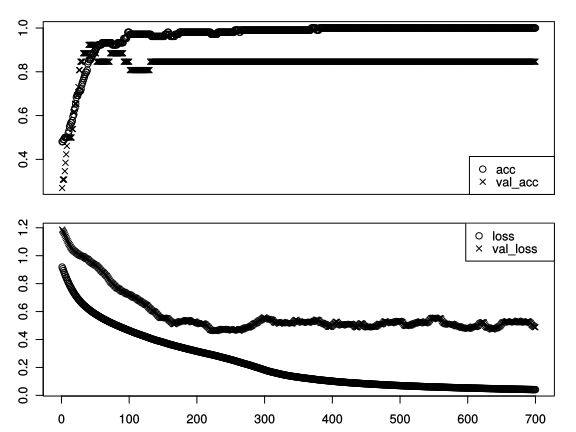

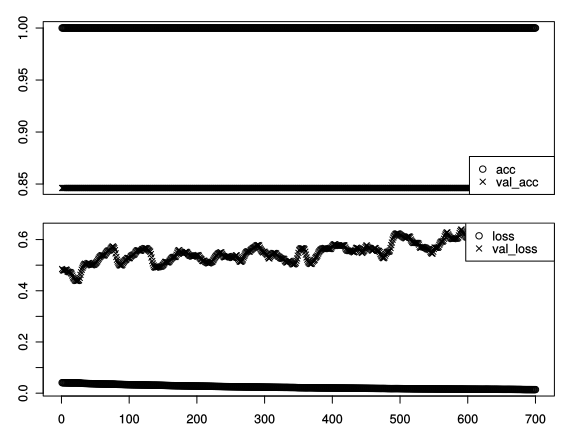

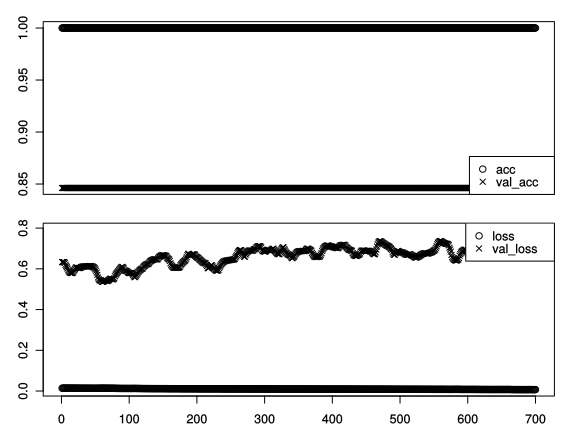

In [51]:
plot(h_adam)
plot(h_sgd)
plot(h_rmsprop)

In [52]:
confusion.matrix <- function(model, title){
    pred <- model %>% 
            predict_classes(new.data, batch_size=64)
    table(test$Species, pred)
    plot(table(test$Species, pred), main=title)
}

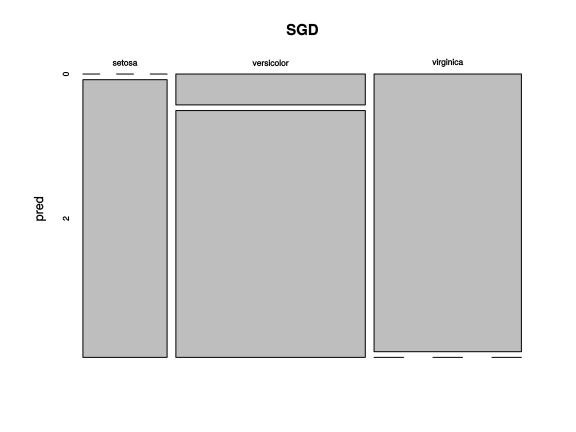

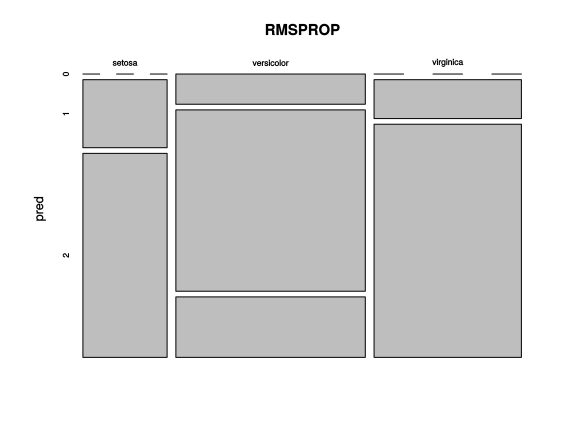

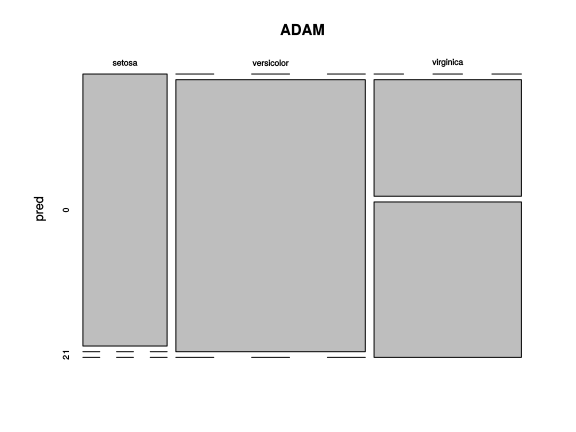

In [53]:
confusion.matrix(model_sgd, "SGD")
confusion.matrix(model_rmsprop, "RMSPROP")
confusion.matrix(model_adam, "ADAM")


In [70]:
# tensorboard("logs/run_adam")

Started TensorBoard at http://127.0.0.1:6183 
